<a href="https://colab.research.google.com/github/CristianChG/Reto-TC3006C/blob/main/TC3006B_CIFAR10_Data_Preparation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---
# TC 3006B Inteligencia artificial avanzada para la ciencia de datos I
# CIFAR-10 Data Preparation (PyTorch)
---
## Feedback

## Deep Learning -- Data Cleaning

--
### Objective: Load CIFAR-10, explore data, compute per-channel statistics (mean & std), normalize images, and verify normalization.
---

### Instructions
- Focus on data preparation, analysis, data is not usually as nice as CIFAR10 is. Model training follows as explained in classes.
- Write comments and reflections in the indicated, verify you answer questions in Markdown cells.
- Keep your code clean, reproducible, and well‑commented.
---
## Team members:
>- Angel Mauricio Ramirez Herrera - A01710158
>- Diego Antonio García Padilla - A01710777
>- José Eduardo Viveros Escamilla - A01710605
>- Kevin Alejandro Ramírez Luna - A01711063
>- Guadalupe Paulina López Cuevas - A01701095
>- Cristian Chávez Guía - A01710680


## Environment & Reproducibility


In [ ]:
# Install libraries as needed, if using Colab, maybe all good

import os, json, random, math, time
from pathlib import Path
import numpy as np
import torch
from torch.utils.data import DataLoader
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt

##########################################
SEED = 42 #for reproducibility
random.seed(SEED)
np.random.seed(SEED)
torch.manual_seed(SEED)
torch.cuda.manual_seed_all(SEED)
###########################################

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)


cpu


---
Primero, se importan distintas librerías con funciones específicas:

> * os: permite interactuar con el sistema operativo (crear carpetas, navegar entre directorios, manejar rutas y variables de entorno).
>
> * json: se utiliza para leer y escribir datos en formato JSON, muy común para almacenar configuraciones o datasets ligeros.
>
> * random: genera números aleatorios o selecciona elementos de manera aleatoria, útil para experimentos o dividir datos.
>
> * math: ofrece funciones matemáticas básicas como potencias, raíces, logaritmos y trigonometría.
>
> * time: permite medir tiempos de ejecución o pausar procesos.
>
> * numpy: una librería fundamental para cálculos numéricos, optimizada para trabajar con arreglos y matrices, operaciones estadísticas, álgebra lineal, transformadas, etc.

Además, se importan librerías especializadas en deep learning:

> * torch (PyTorch): un framework de aprendizaje profundo muy usado en investigación y desarrollo de modelos.
>
> * torch.utils.data.DataLoader: facilita el manejo de datasets, permitiendo cargarlos en lotes (batches), barajarlos (shuffle) y optimizar su lectura durante el entrenamiento.
>
> * torchvision y torchvision.datasets, torchvision.transforms: extensiones de PyTorch diseñadas para visión por computadora. Incluyen datasets de imágenes comunes, herramientas para preprocesamiento (como normalización, escalado o aumento de datos) y modelos preentrenados.
>
> * matplotlib.pyplot: se utiliza para visualizar datos, por ejemplo, mostrar imágenes, gráficas de pérdidas o métricas durante el entrenamiento.

SEED es una variable de una semilla aleatoria, esto sirve para que los resultados del Código sean reporoducibles ya que en machine learning y deep learning, muchos procesos usan números aleatorios. Si no se fija una semilla, cada vez que se ejecute el programa se obtendrán resultados diferentes y con la semilla se garantiza que los experimentos se puedan repetir y comparar.

El número 42 no significa algo como tal, simplemente es famoso en ciencia de datos como "la respuesta al universo".

Finalmente, existe una línea de código que define qué dispositivo ejecutará el modelo. Si la computadora personal tiene una GPU compatible con CUDA, PyTorch la usará para la aceleración por hardware para entrenar mucho más rápido y si no hay GPU disponible, el entrenamiento se hará en el procesador.


## Download & Load CIFAR-10 (Train/Test Splits)


#### If using Colab you may need the following

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/ESCUELA/IRS/7MO/IA-1/RETO')

In [ ]:
# Maybe obvious, adjust path according to your needs
DATA_DIR = Path("/content/drive/MyDrive/ESCUELA/IRS/7MO/IA-1/RETO")
DATA_DIR.mkdir(parents=True, exist_ok=True)

# Base transform for statistics: convert to tensor only (no normalization/augmentations yet)
base_transform = transforms.ToTensor()

train_set = datasets.CIFAR10(root=DATA_DIR, train=True, download=True, transform=base_transform)
test_set  = datasets.CIFAR10(root=DATA_DIR, train=False, download=True, transform=base_transform)

len(train_set), len(test_set), train_set.data.shape


100%|██████████| 170M/170M [00:11<00:00, 14.8MB/s]


(50000, 10000, (50000, 32, 32, 3))

---
Path crea una ruta hacia la carpeta donde se van a guardar los datos. En este caso es una carpeta de Google Drive. mkdir crea la carpeta si no existe y da error si está creada. Con esto se garantiza que los datasets se guarden en un lugar definido y no se descarguen cada vez desde cero.

transforms.ToTensor() convierte cada imagen del dataset en un tensor de PyTorch (un arreglo numérico optimizado). Antes las imágenes están en formato PIL (Python Imaging Library) con valores de 0 a 255 por píxel. Después de aplicar .ToTensor(), se convierten en valores flotantes entre 0 y 1, listos para que la red neuronal los procese.

Se está usando el dataset CIFAR-10, uno de los más populares en visión por computadora.

Contiene 60,000 imágenes en color (32x32 píxeles) distribuidas en 10 clases (avión, coche, pájaro, gato, perro, rana, etc.).

Parámetros:

> * root=DATA_DIR → dónde guardar el dataset.
>
> * train=True → indica que se descarguen los 50,000 ejemplos de entrenamiento.
>
> * train=False → obtiene los 10,000 ejemplos de prueba.
>
> * download=True → si no está descargado, lo baja automáticamente.
>
> * transform=base_transform → aplica la conversión a tensor al cargar las imágenes.


### Explore de dataset


In [ ]:
classes = train_set.classes
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

Una de las primeras cosas que debemos hacer para poder empezar a trabajar con nuestro dataset es visualizar que es lo que tenemos dentro del dataset, en este caso lo que hacemos es imprimir cuales son las clases con las que vamos a trabajar.


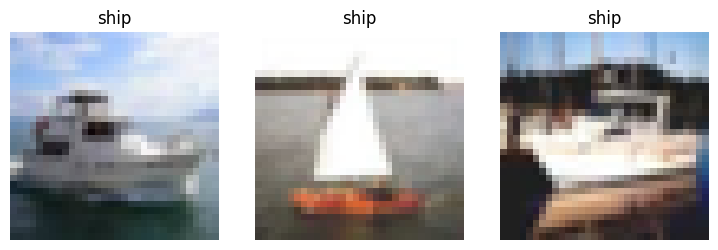

In [ ]:
def show_images(dataset, n=5):
    fig, axes = plt.subplots(1, n, figsize=(n*2.5, 2.5))
    for ax in axes:
        idx = np.random.randint(0, len(dataset))
        img, label = dataset[idx]
        # img: tensor [C,H,W] in [0,1]
        ax.imshow(np.transpose(img.numpy(), (1, 2, 0)))  # HWC
        ax.set_title(classes[label])
        ax.axis("off")
    plt.tight_layout()
    plt.show()

show_images(train_set, n=3)


---
Para esto lo que hacemos es crear una funcion donde vamos hacer un bucle donde dentro creamos una figura que va a contener 3 de las imagenes de nuestro dataset de manera aleatoria, donde tambien ponemos el titulo de a que clase pertenece, estas imagenes se enseñan de manera aleatoria para que cada que se corra el codigo este arroje diferentes imagenes cada vez.


> **Reflection (Markdown):** Describe CIFAR‑10 (resolution, channels, number of classes/samples). Include one sentence on why normalization is helpful for training.



## Compute Per‑Channel Mean & Standard Deviation



In [ ]:
BATCH_SIZE = 512
train_loader = DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)

'''
Compute mean and std, before normalization

'''
import numpy as np
import pandas as pd

# train_set es una lista (tensor_imagen, etiqueta) convertir a arrays de numpy
images_np = [np.transpose(img.numpy(), (1, 2, 0)) for img, _ in train_set]
# Convertir lista de arrays a un solo array
images_np = np.array(images_np)
# Reshape para tener todos los píxeles en la última dimensión (num_imágenes, altura * ancho, canales)
reshaped_images = images_np.reshape(images_np.shape[0], -1, images_np.shape[-1])
# Calcular media y desviación estándar en la dimensión de píxeles(axis=1)
# Sacar promedio de las imágenes (axis=0)
mean = np.mean(reshaped_images, axis=(0, 1))
std = np.std(reshaped_images, axis=(0, 1))

print("Mean:", mean)
print("Std:", std)

Mean: [0.32768 0.32768 0.32768]
Std: [0.27755317 0.26929596 0.26811677]



> Record your computed values here (e.g., `Mean ≈ [0.4914, 0.4822, 0.4465]`, `Std ≈ [0.2470, 0.2435, 0.2616]`). Your numbers should closely match these canonical references.



## Normalize Datasets Using Computed Stats


In [ ]:
normalize = transforms.Normalize(mean=mean.tolist(), std=std.tolist())

train_transform = transforms.Compose([
    transforms.ToTensor(),
    normalize,
])

test_transform = transforms.Compose([
    transforms.ToTensor(),
    normalize,
])

train_set_norm = datasets.CIFAR10(root=DATA_DIR, train=True, download=False, transform=train_transform)
test_set_norm  = datasets.CIFAR10(root=DATA_DIR, train=False, download=False, transform=test_transform)

len(train_set_norm), len(test_set_norm)


(50000, 10000)

---
Esta función normaliza el dataset CIFAR-10 usando transformaciones de PyTorch. Define pipelines que convierten imágenes a tensores y las normalizan con valores de media y desviación estándar pre-calculados, creando conjuntos de entrenamiento y prueba estandarizados para mejorar el entrenamiento del modelo.

Lo que acelera la convergencia del modelo y mejora la estabilidad durante el entrenamiento de redes neuronales.


## Verify Normalization (Means ≈ 0, Stds ≈ 1)

Confirm the transformation worked as intended.


In [ ]:
train_loader_norm = DataLoader(train_set_norm, batch_size=BATCH_SIZE, shuffle=False, num_workers=2, pin_memory=True)

'''
Verify that data are normalized
'''
import numpy as np
import pandas as pd

# Convertir a arrays
normalized_images_np = [np.transpose(img.numpy(), (1, 2, 0)) for img, _ in train_set_norm]
# Convertir lista de arrays a un solo array
normalized_images_np = np.array(normalized_images_np)
# Reshape para tener todos los píxeles en la última dimensión (número_imágenes, altura * ancho, canales)
reshaped_images_norm = normalized_images_np.reshape(normalized_images_np.shape[0], -1, normalized_images_np.shape[-1])
# Calcular media y desviación estándar
mean_norm = np.mean(reshaped_images_norm, axis=(0, 1))
std_norm = np.std(reshaped_images_norm, axis=(0, 1))

print("Media:", mean_norm)
print("Std:", std_norm)

Media: [0.5971052  0.57570213 0.45117134]
Std: [0.8350855  0.84559965 0.9019694 ]


---
Confirmamos que realizamos correctamente la normalización verificando que los valores de la media esten cercanos a 0 o la std a 1.
Con esto nuestra CNN aprende mucho mejor con datos ya centrados y escalados.


> Report the post‑normalization means and stds. They should be close to `[0,0,0]` and `[1,1,1]` (small deviations are normal due to rounding/batching).



## Light Data Augmentation
Add a few basic augmentations (random crop with padding, random horizontal flip). Use **train** only.


In [ ]:

aug_transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    #anything else you may want to add is welcomed
    normalize,
])

train_set_aug = datasets.CIFAR10(root=DATA_DIR, train=True, download=False, transform=aug_transform)
len(train_set_aug)


50000

---
Aplicamos una serie de transformaciones a las imagenes para cambiar un poco las imagenes a la hora del entrenamiento.
Para esto usamos la función `trasnforms.compose`, para concatenar una seríe de transformaciones una tras otra; en este caso, aplicamos una rotación horizontal y una normalización de la imagen (transforma el valor de los pixeles de la imagen).



> Explain when/why augmentation helps. What risks do heavy augmentations pose for small images like CIFAR‑10 (32×32)?



## Class Distribution
Confirm class balance. CIFAR‑10 should be balanced across the 10 classes. Create a plot as a visual aid


Class distribution: {'airplane': np.int64(5000), 'automobile': np.int64(5000), 'bird': np.int64(5000), 'cat': np.int64(5000), 'deer': np.int64(5000), 'dog': np.int64(5000), 'frog': np.int64(5000), 'horse': np.int64(5000), 'ship': np.int64(5000), 'truck': np.int64(5000)}


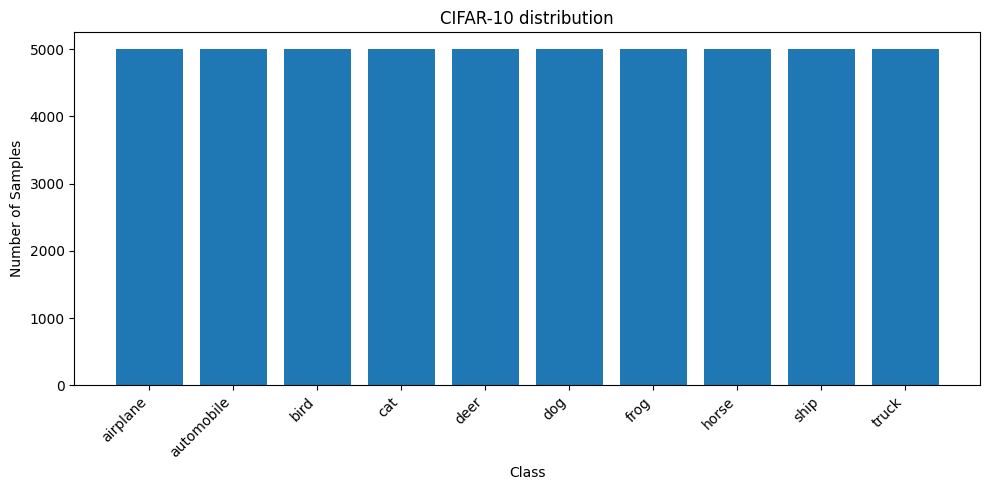

In [ ]:
'''
Cifar10 is perfectly distributed among classes, this will not always be the case, plots help, numbers help
'''

# show class distribution
class_counts = np.bincount(train_set.targets)
print("Class distribution:", dict(zip(classes, class_counts)))

# show plot
plt.figure(figsize=(10, 5))
plt.bar(classes, class_counts)
plt.title('CIFAR-10 distribution')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

---
Finalmente, graficamos cuántas imágenes hay por clase en el dataset `CIFAR-10`. Primero cuenta cuántas muestras hay de cada categoría (como “gato”, “avión”, etc.), luego imprime esos números y finalmente genera una gráfica de barras para mostrar la distribución de forma clara.


## 9. Submission Checklist
- [ ] Printed dataset sizes and showed random sample images.
- [ ] Reported per‑channel mean & std from the training set.
- [ ] Applied normalization using computed stats.
- [ ] Verified post‑normalization mean/std are ~0/1.
- [ ] Basic augmentations and rationale.
